# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


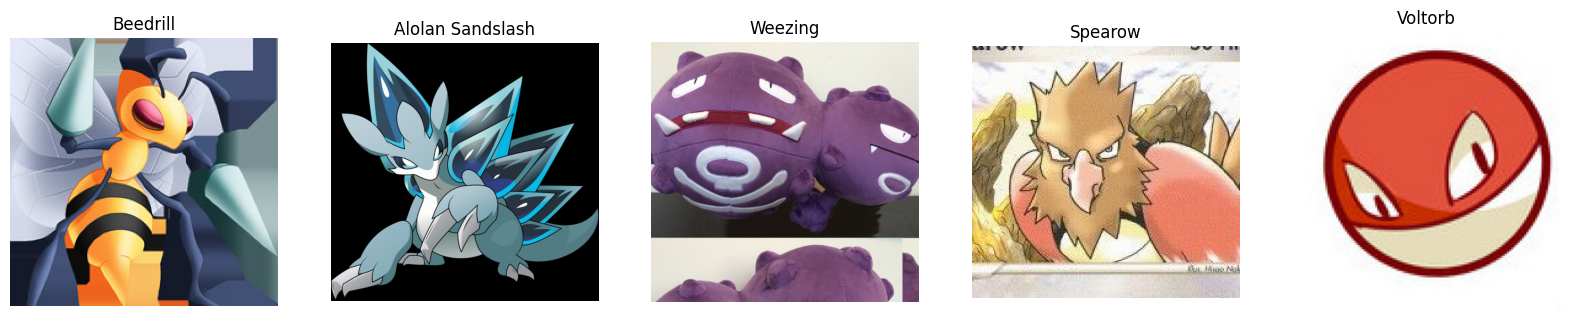

In [30]:
# Start off by randomly picking images from the training set and displaying them with a Unknown label at the bottom
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#print whole directory


training_directory = 'data/training_set'
testing_directory = 'data/testing_set'


poke_list = os.listdir("data/images")
poke_dict = {string: index for index, string in enumerate(poke_list)}

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [31]:
from PIL import Image
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)



#loop through creating dataset that contains [label, path_to_image]
dataset = []
for poke_folder in os.listdir(training_directory):
    for poke_img in os.listdir(training_directory + '/' + poke_folder):
        img = resize_image(training_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
    
    
# place training data into x and labels into y
labels = [x[0] for x in dataset]
images = [x[1] for x in dataset]
labels = [poke_dict[item] for item in labels]

images = np.array(images)
labels = np.array(labels)


images = images / 255.0


# Flatten the image arrays for the MLP input
images = images.reshape(images.shape[0], -1)
# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20)

x_train = x_train.reshape(x_train.shape[0],64,64,3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)





In [36]:
import tensorflow as tf
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import BatchNormalization
#do not do tensorflow.keras, import keras manually when you get this error
from keras import datasets, layers, models


model = models.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.summary()

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 64)       

In [37]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, 
                    batch_size= 16,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


Epoch 1/20
270/270 [==============================] - 40s 145ms/step - loss: 5.0772 - accuracy: 0.0086 - val_loss: 5.0166 - val_accuracy: 0.0111
Epoch 2/20
270/270 [==============================] - 37s 138ms/step - loss: 4.9935 - accuracy: 0.0104 - val_loss: 4.8701 - val_accuracy: 0.0223
Epoch 3/20
270/270 [==============================] - 38s 141ms/step - loss: 4.5455 - accuracy: 0.0390 - val_loss: 4.2856 - val_accuracy: 0.0705
Epoch 4/20
270/270 [==============================] - 37s 138ms/step - loss: 4.0256 - accuracy: 0.0961 - val_loss: 3.7869 - val_accuracy: 0.1299
Epoch 5/20
270/270 [==============================] - 39s 143ms/step - loss: 3.5229 - accuracy: 0.1754 - val_loss: 3.3199 - val_accuracy: 0.2338
Epoch 6/20
270/270 [==============================] - 40s 147ms/step - loss: 2.9540 - accuracy: 0.2738 - val_loss: 3.0240 - val_accuracy: 0.2811
Epoch 7/20
270/270 [==============================] - 39s 143ms/step - loss: 2.4336 - accuracy: 0.3742 - val_loss: 2.9839 - val_ac

34/34 [==============================] - 1s 27ms/step


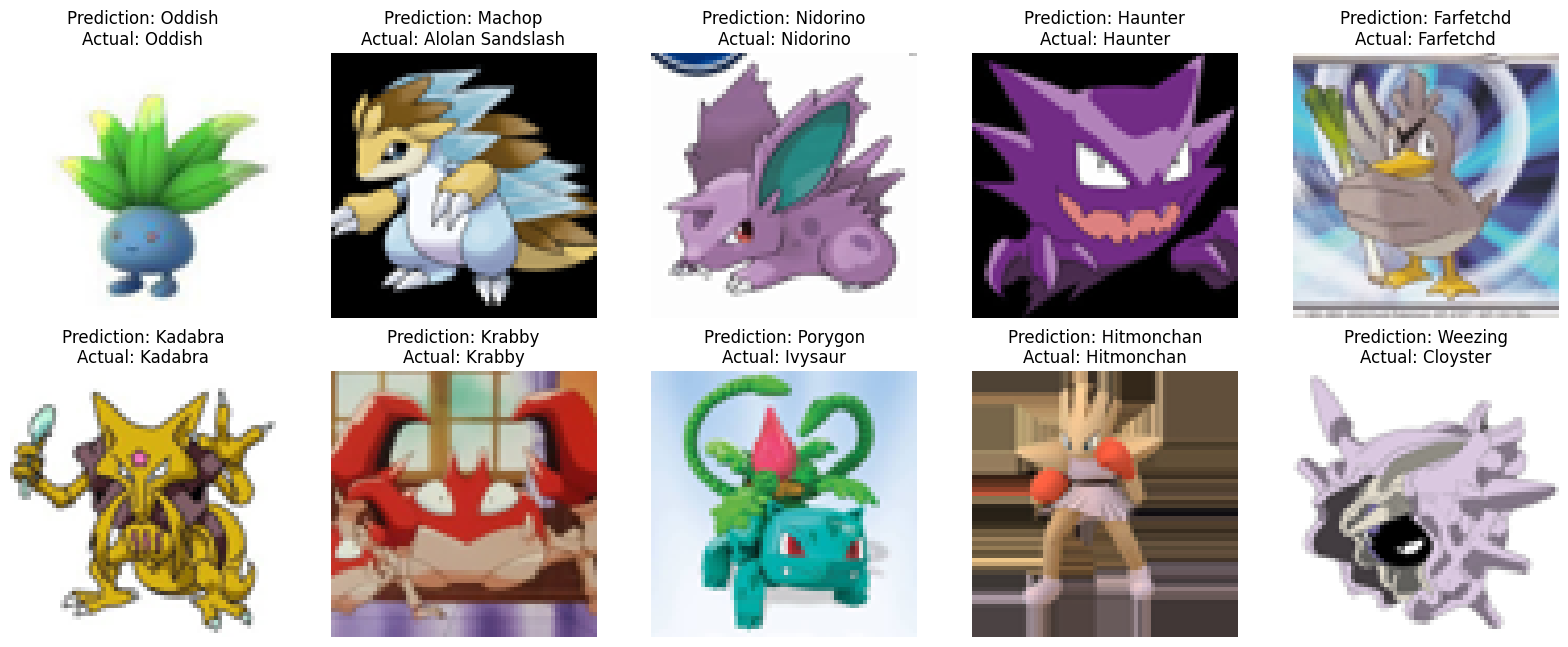

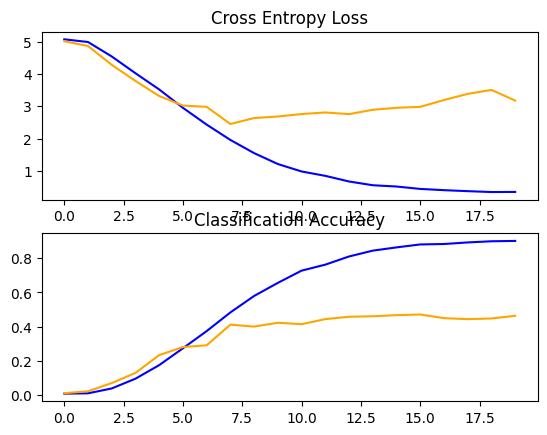

Accuracy for class: Abra         is 57.1 %
Accuracy for class: Aerodactyl   is 37.5 %
Accuracy for class: Alakazam     is 100.0 %
Accuracy for class: Alolan Sandslash is 20.0 %
Accuracy for class: Arbok        is 33.3 %
Accuracy for class: Arcanine     is 33.3 %
Accuracy for class: Articuno     is 100.0 %
Accuracy for class: Beedrill     is 66.7 %
Accuracy for class: Bellsprout   is 57.1 %
Accuracy for class: Blastoise    is 62.5 %
Accuracy for class: Bulbasaur    is 100.0 %
Accuracy for class: Butterfree   is 100.0 %
Accuracy for class: Caterpie     is 66.7 %
Accuracy for class: Chansey      is 42.9 %
Accuracy for class: Charizard    is 40.0 %
Accuracy for class: Charmander   is 50.0 %
Accuracy for class: Charmeleon   is 36.4 %
Accuracy for class: Clefable     is 100.0 %
Accuracy for class: Clefairy     is 71.4 %
Accuracy for class: Cloyster     is 41.7 %
Accuracy for class: Cubone       is 42.9 %
Accuracy for class: Dewgong      is 20.0 %
Accuracy for class: Diglett      is 55.6 %
Ac

In [43]:
import sys

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # plt.savefig(filename + '_plot.png')
    # plt.close()



# Define class names
class_names = poke_list

# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in class_names}
total_pred = {classname: 0 for classname in class_names}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {class_names[predicted_labels[i]]}\nActual: {class_names[y_test[i]]}")
    
    plt.axis("off")

plt.show()

summarize_diagnostics(history)
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = class_names[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')

